In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
df = pd.read_pickle('/home/sherwin/Projects/fitness_tracker/MetaMotion/03_data_feaatures.pkl')

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,heavy,30,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,1
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,heavy,30,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,90,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,3
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,90,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,0
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,0


In [ ]:
df_train = df.drop(["participant","category","set"],axis=1)


X = df_train.drop("label",axis=1)
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
basic_features = ["acc_x", "acc_y", "acc_z","gyr_x", "gyr_y", "gyr_z"]
square_features =["acc_r","gyr_r"]
pca_features =["pca_1","pca_2","pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if ("_freq" in f) or ("_pse" in f )]
cluster_features = ["cluster"]

In [ ]:
print("Basic features",len(basic_features))
print("Square features",len(square_features))
print("PCA features",len(pca_features))
print("Time features",len(time_features))
print("Frequency features",len(freq_features))
print("Cluster features",len(cluster_features))

Basic features 6
Square features 2
PCA features 3
Time features 16
Frequency features 88
Cluster features 1


In [ ]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features)) 
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

In [ ]:
learner = ClassificationAlgorithms()

max_features = 10

selected_features,ordered_features,ordered_scores = learner.forward_selection(max_features, X_train,y_train)

0
1
2
3
4
5
6
7
8
9


In [ ]:
possible_feature_sets =[
     
     feature_set_1,
     feature_set_2,
     feature_set_3,
     feature_set_4,
     selected_features,
]

In [ ]:
feature_names = [

    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features",

]

In [ ]:
iterations = 1 
score_df = pd.DataFrame()

In [ ]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [ ]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.936918
1,RF,Feature Set 1,0.960703
2,KNN,Feature Set 1,0.792141
3,DT,Feature Set 1,0.927611
4,NB,Feature Set 1,0.854188
0,NN,Feature Set 2,0.935884
1,RF,Feature Set 2,0.956567
2,KNN,Feature Set 2,0.789038
3,DT,Feature Set 2,0.926577
4,NB,Feature Set 2,0.863495


In [ ]:
score_df.sort_values(by = "accuracy", ascending = False, inplace=True)

In [ ]:
import seaborn as sns

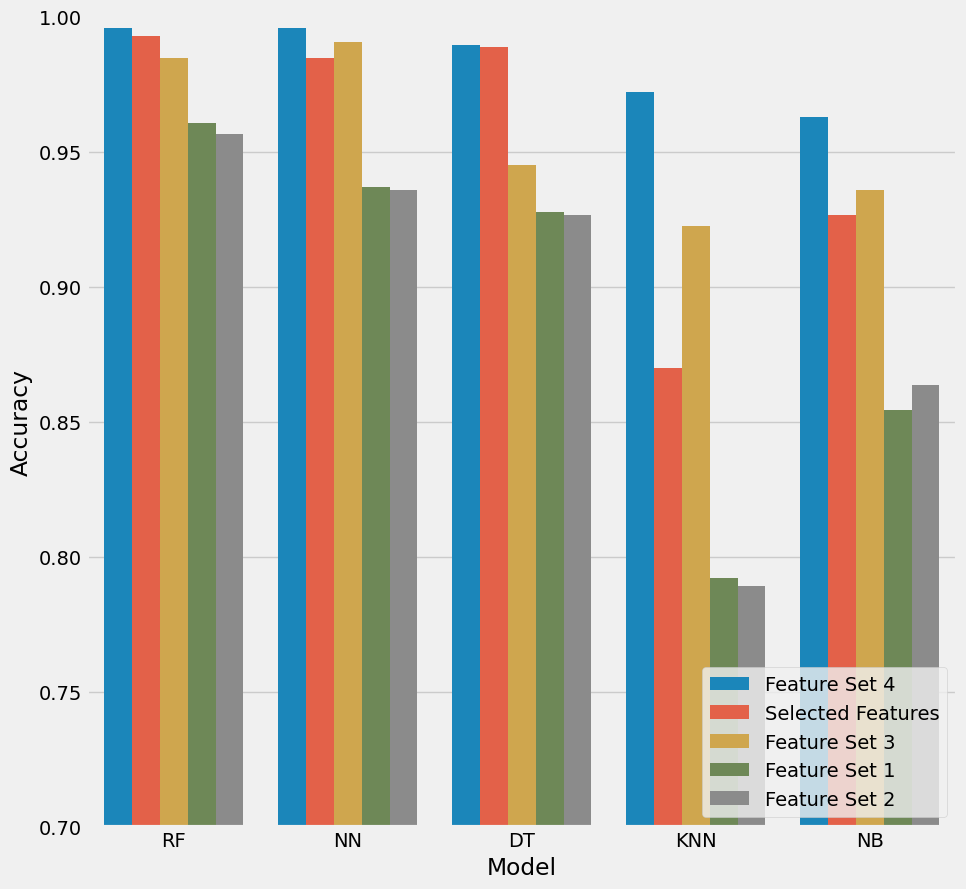

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7,1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
)= learner.random_forest(
    X_train[feature_set_4],
    y_train,
    X_test[feature_set_4],
    gridsearch=True
)

In [ ]:
accuracy = accuracy_score(y_test,class_test_y)

In [ ]:
accuracy

0.9948293691830403

In [ ]:
classes = class_test_prob_y.columns

cm = confusion_matrix(y_test, class_test_y, labels = classes)

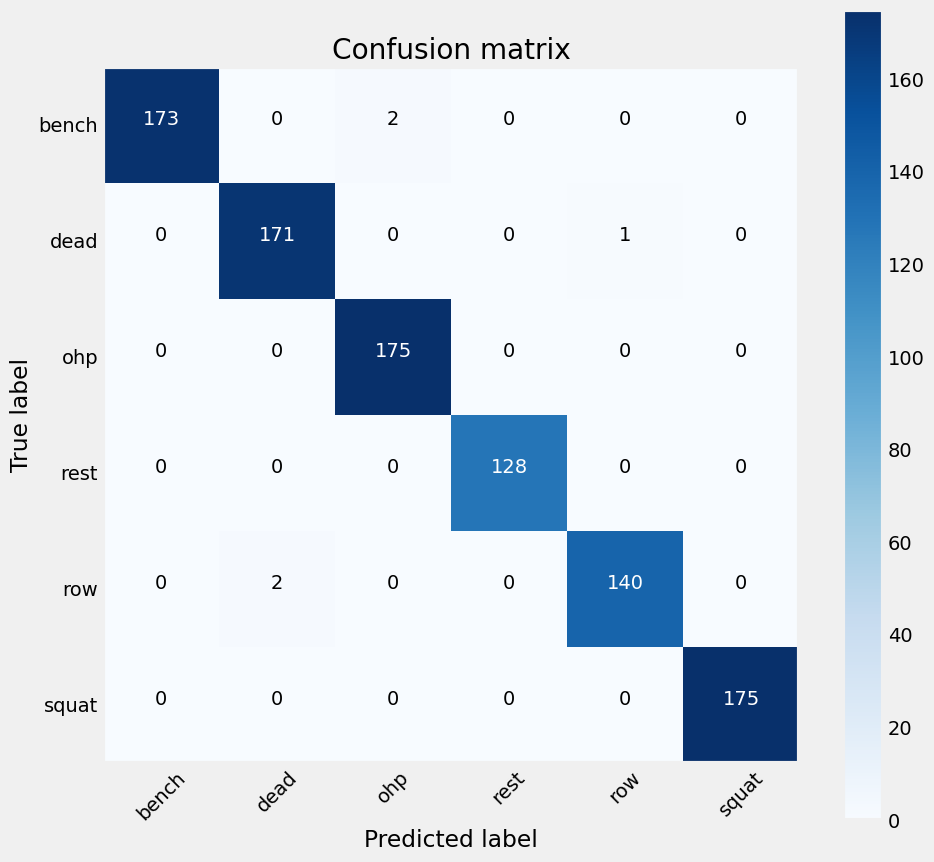

In [ ]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
participant_df = df.drop(["set","category"],axis=1)

In [ ]:
participant_df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,0.306308,-0.170012,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,0.286807,-0.077810,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,0.324602,-0.068072,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,0.324352,-0.066294,...,0.479839,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,1
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,0.295388,-0.080264,...,0.404515,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,-0.340833,-0.024316,...,0.327550,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,3
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,-0.429542,-0.180736,...,0.298590,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,0
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,-0.346775,-0.147540,...,0.211363,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,0


In [ ]:
X_train = participant_df[participant_df["participant"]!= "A"].drop("label",axis=1)
y_train = participant_df[participant_df["participant"]!= "A"]["label"]

In [ ]:
X_test = participant_df[participant_df["participant"] == "A"].drop("label",axis=1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

In [ ]:
X_train =  X_train.drop(["participant"],axis=1)
X_test =  X_test.drop(["participant"],axis=1)

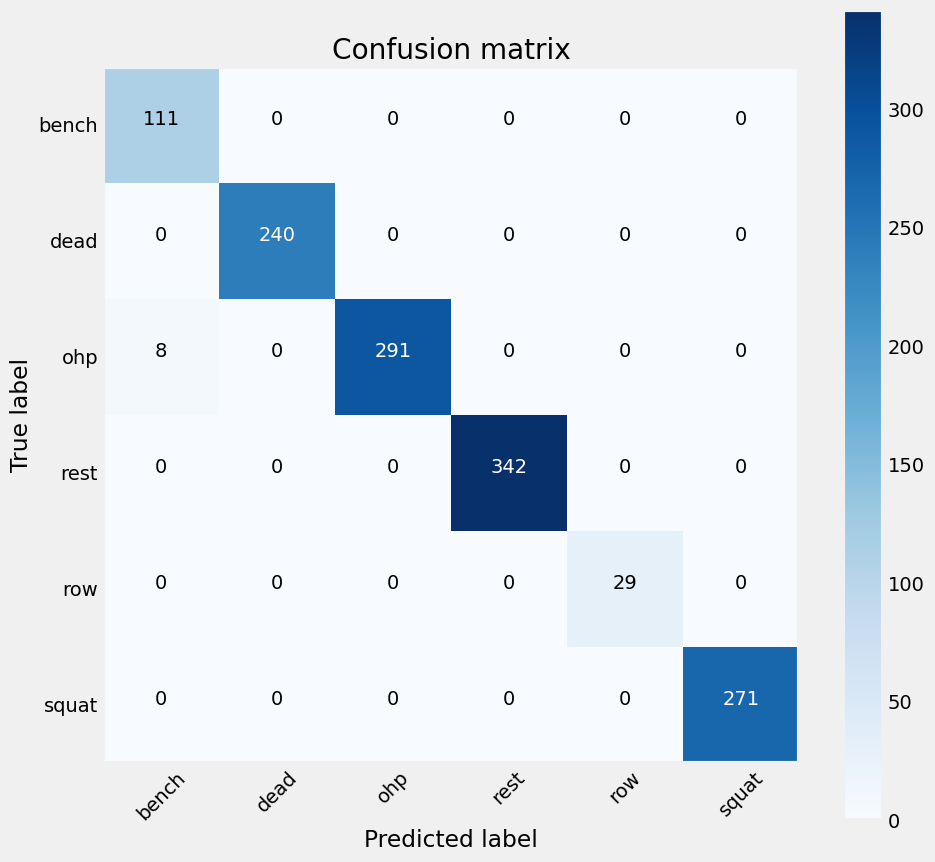

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
)= learner.random_forest(
    X_train[feature_set_4],
    y_train,
    X_test[feature_set_4],
    gridsearch=True
)

accuracy = accuracy_score(y_test,class_test_y)

classes = class_test_prob_y.columns

cm = confusion_matrix(y_test, class_test_y, labels = classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

/home/sherwin/Projects/fitness_tracker/fitness_tracker/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


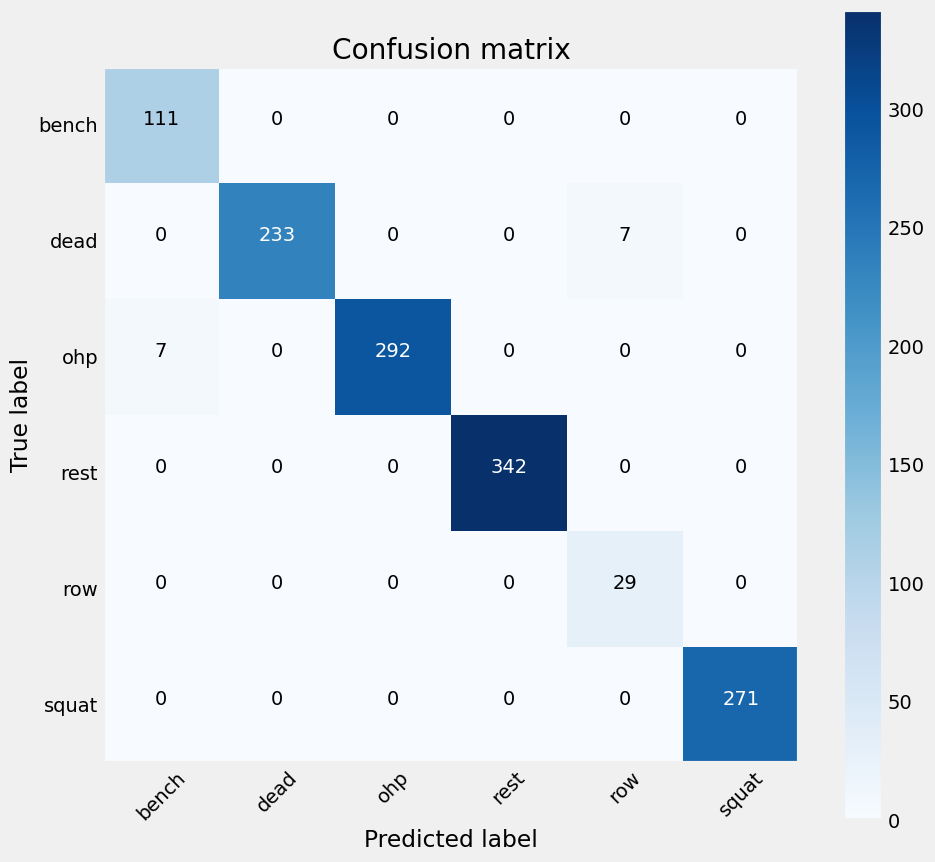

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
)= learner.feedforward_neural_network(
    X_train[selected_features],
    y_train,
    X_test[selected_features],
    gridsearch=True
)

accuracy = accuracy_score(y_test,class_test_y)

classes = class_test_prob_y.columns

cm = confusion_matrix(y_test, class_test_y, labels = classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
accuracy

0.9891640866873065

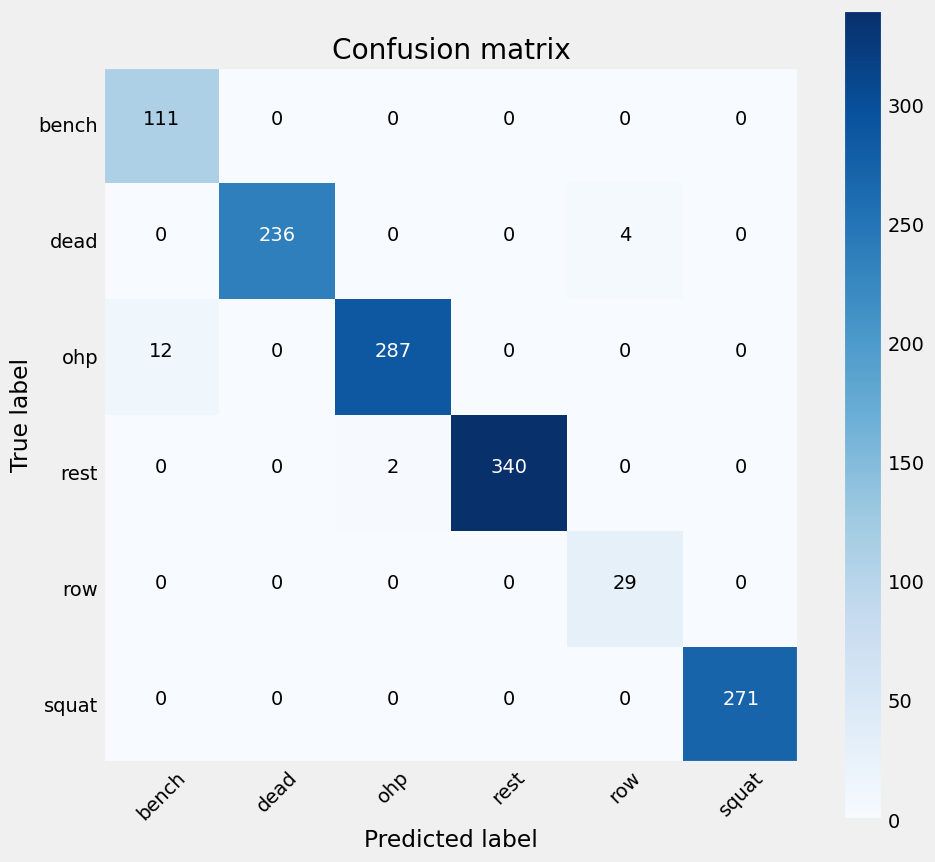

In [ ]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
)= learner.random_forest(
    X_train[feature_set_4],
    y_train,
    X_test[feature_set_4],
    gridsearch=True
)

accuracy = accuracy_score(y_test,class_test_y)

classes = class_test_prob_y.columns

cm = confusion_matrix(y_test, class_test_y, labels = classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
accuracy

0.9860681114551083

In [ ]:
import pickle

In [ ]:
with open('Model/trained_model.pkl', 'wb') as file:
    pickle.dump(learner, file)